In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Q1a. Demographics

In [11]:
#More of Non Senior Citizens Patronize Brand
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [12]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [24]:
df.groupby(['SeniorCitizen','gender'])['gender'].count()

SeniorCitizen  gender
0              Female    2920
               Male      2981
1              Female     568
               Male       574
Name: gender, dtype: int64

In [28]:
df.groupby(['SeniorCitizen','gender','Partner','Dependents']).agg({'gender':'count'}).sort_values(by='SeniorCitizen',ascending=True)

gender
SeniorCitizen gender Partner Dependents        
0             Female No      No            1338
                             Yes            142
                     Yes     No             596
                             Yes            844
              Male   No      No            1381
                             Yes            211
                     Yes     No             567
                             Yes            822
1             Female No      No             317
                             Yes              3
                     Yes     No             209
                             Yes             39
              Male   No      No             244
                             Yes              5
                     Yes     No             281
                             Yes             44

Q1a. Ans:Young Citizens (Male and Female) with no dependents nor partners 

#### Q1b: Customer Retention

In [31]:
df.query('Churn=="Yes"').groupby(['SeniorCitizen','gender','Partner','Dependents']).agg({'Churn':'count'}).sort_values(by='SeniorCitizen',ascending=True)

Churn
SeniorCitizen gender Partner Dependents       
0             Female No      No            429
                             Yes            32
                     Yes     No            114
                             Yes           124
              Male   No      No            418
                             Yes            43
                     Yes     No            128
                             Yes           105
1             Female No      No            158
                             Yes             1
                     Yes     No             73
                             Yes             8
              Male   No      No            118
                             Yes             1
                     Yes     No            105
                             Yes            12

Q1b. Ans: Target especially Young Singles with no dependents or partners, as well as people without dependents. 

#### Q2a. Monthly Service Charges & higher Churning

In [104]:
df.query('Churn=="Yes"').groupby(['PhoneService'],as_index=False).agg({'MonthlyCharges':'sum'}).sort_values(by='MonthlyCharges',ascending=False)

,PhoneService,MonthlyCharges
1,Yes,132750.10
0,No,6380.75


C:\Users\Puffs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Phone Service Charges'}, xlabel='PhoneService', ylabel='MonthlyCharges'>

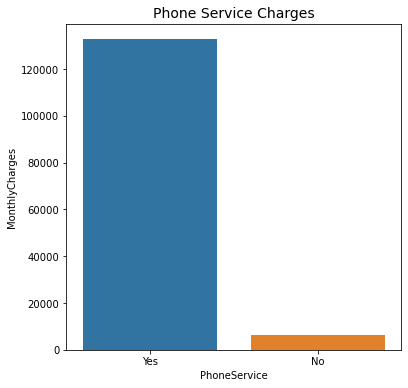

In [113]:
dfsvs1=df.query('Churn=="Yes"').groupby(['PhoneService'],as_index=False).agg({'MonthlyCharges':'sum'}).sort_values(by='MonthlyCharges',ascending=False)
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title( "Phone Service Charges" , size = 14 )
x=dfsvs1.PhoneService;y=dfsvs1.MonthlyCharges
sns.barplot(x,y)


In [105]:
df.query('Churn=="Yes"').groupby(['MultipleLines'],as_index=False).agg({'MonthlyCharges':'sum'}).sort_values(by='MonthlyCharges',ascending=False)

,MultipleLines,MonthlyCharges
2,Yes,75710.50
0,No,57039.60
1,No phone service,6380.75


C:\Users\Puffs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'MultipleLine Service Charges'}, xlabel='MultipleLines', ylabel='MonthlyCharges'>

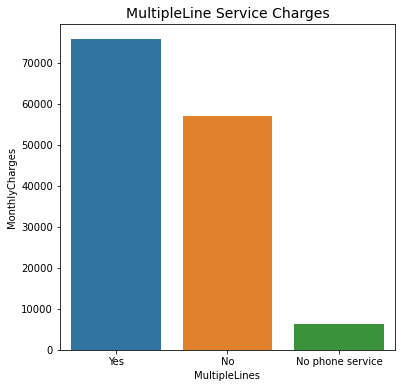

In [87]:
dfsvs2=df.query('Churn=="Yes"').groupby(['MultipleLines'],as_index=False).agg({'MonthlyCharges':'sum'}).sort_values(by='MonthlyCharges',ascending=False)
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title( "MultipleLine Service Charges" , size = 14 )
sns.barplot(dfsvs2.MultipleLines,dfsvs2.MonthlyCharges)

In [106]:
df.query('Churn=="Yes"').groupby(['InternetService'],as_index=False).agg({'MonthlyCharges':'sum'}).sort_values(by='MonthlyCharges',ascending=False)

,InternetService,MonthlyCharges
1,Fiber optic,114300.05
0,DSL,22529.20
2,No,2301.60


C:\Users\Puffs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Internet Service Charges'}, xlabel='InternetService', ylabel='MonthlyCharges'>

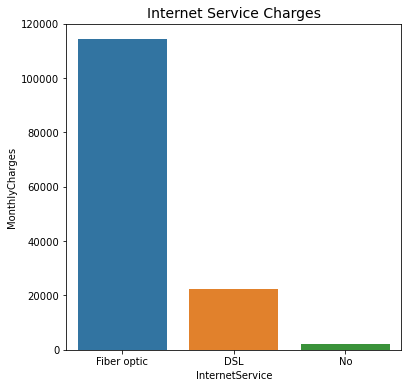

In [89]:
dfsvs3=df.query('Churn=="Yes"').groupby(['InternetService'],as_index=False).agg({'MonthlyCharges':'sum'}).sort_values(by='MonthlyCharges',ascending=False)
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title( "Internet Service Charges" , size = 14 )
sns.barplot(dfsvs3.InternetService,dfsvs3.MonthlyCharges)

In [107]:
df.query('Churn=="Yes"').groupby(['OnlineSecurity'],as_index=False).agg({'MonthlyCharges':'sum'}).sort_values(by='MonthlyCharges',ascending=False)

,OnlineSecurity,MonthlyCharges
0,No,112762.75
2,Yes,24066.50
1,No internet service,2301.60


C:\Users\Puffs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Online Security Charges'}, xlabel='OnlineSecurity', ylabel='MonthlyCharges'>

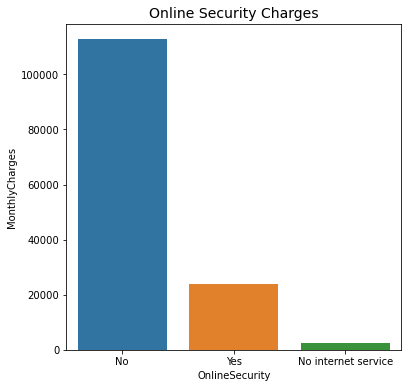

In [92]:
dfsvs4=df.query('Churn=="Yes"').groupby(['OnlineSecurity'],as_index=False).agg({'MonthlyCharges':'sum'}).sort_values(by='MonthlyCharges',ascending=False)
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title( "Online Security Charges" , size = 14 )
sns.barplot(dfsvs4.OnlineSecurity,dfsvs4.MonthlyCharges)

In [114]:
df.query('Churn=="Yes"').groupby(['OnlineBackup'],as_index=False).agg({'MonthlyCharges':'sum'}).sort_values(by='MonthlyCharges',ascending=False)

,OnlineBackup,MonthlyCharges
0,No,91873.85
2,Yes,44955.40
1,No internet service,2301.60


C:\Users\Puffs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Online Backup Charges'}, xlabel='OnlineBackup', ylabel='MonthlyCharges'>

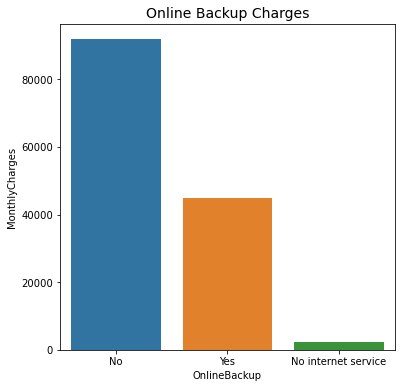

In [94]:
dfsvs5=df.query('Churn=="Yes"').groupby(['OnlineBackup'],as_index=False).agg({'MonthlyCharges':'sum'}).sort_values(by='MonthlyCharges',ascending=False)
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title( "Online Backup Charges" , size = 14 )
sns.barplot(dfsvs5.OnlineBackup,dfsvs5.MonthlyCharges)

In [115]:
df.query('Churn=="Yes"').groupby(['DeviceProtection'],as_index=False).agg({'MonthlyCharges':'sum'}).sort_values(by='MonthlyCharges',ascending=False)

,DeviceProtection,MonthlyCharges
0,No,88752.25
2,Yes,48077.00
1,No internet service,2301.60


C:\Users\Puffs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Device Protection Charges'}, xlabel='DeviceProtection', ylabel='MonthlyCharges'>

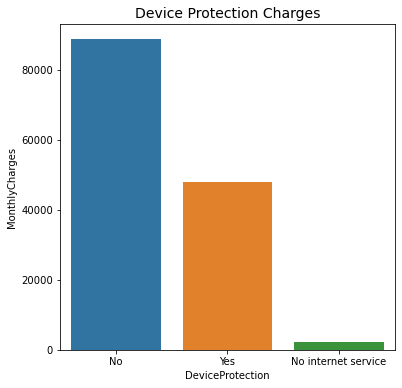

In [99]:
dfsvs5=df.query('Churn=="Yes"').groupby(['DeviceProtection'],as_index=False).agg({'MonthlyCharges':'sum'}).sort_values(by='MonthlyCharges',ascending=False)
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Device Protection Charges" , size = 14 )
sns.barplot(dfsvs5.DeviceProtection,dfsvs5.MonthlyCharges)

In [116]:
df.query('Churn=="Yes"').groupby(['TechSupport'],as_index=False).agg({'MonthlyCharges':'sum'}).sort_values(by='MonthlyCharges',ascending=False)

,TechSupport,MonthlyCharges
0,No,110709.80
2,Yes,26119.45
1,No internet service,2301.60


C:\Users\Puffs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Tech Support Service Charges'}, xlabel='TechSupport', ylabel='MonthlyCharges'>

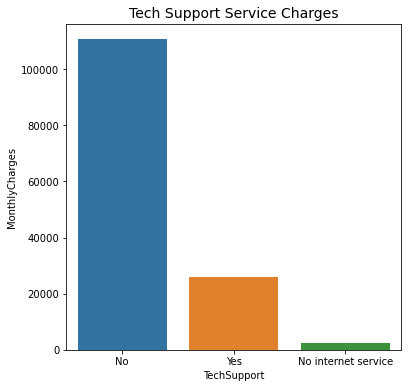

In [100]:
dfsvs5=df.query('Churn=="Yes"').groupby(['TechSupport'],as_index=False).agg({'MonthlyCharges':'sum'}).sort_values(by='MonthlyCharges',ascending=False)
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title( "Tech Support Service Charges" , size = 14 )
sns.barplot(dfsvs5.TechSupport,dfsvs5.MonthlyCharges)

In [117]:
df.query('Churn=="Yes"').groupby(['StreamingTV'],as_index=False).agg({'MonthlyCharges':'sum'}).sort_values(by='MonthlyCharges',ascending=False)

,StreamingTV,MonthlyCharges
2,Yes,73664.85
0,No,63164.40
1,No internet service,2301.60


C:\Users\Puffs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'StreamingTV Service Charges'}, xlabel='StreamingTV', ylabel='MonthlyCharges'>

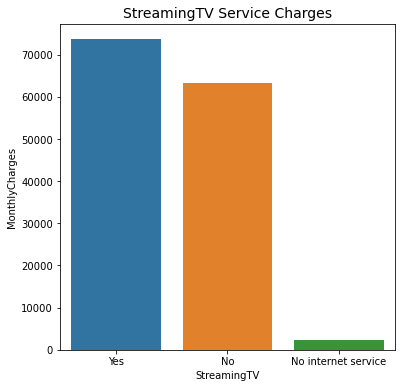

In [101]:
dfsvs5=df.query('Churn=="Yes"').groupby(['StreamingTV'],as_index=False).agg({'MonthlyCharges':'sum'}).sort_values(by='MonthlyCharges',ascending=False)
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title( "StreamingTV Service Charges" , size = 14 )
sns.barplot(dfsvs5.StreamingTV,dfsvs5.MonthlyCharges)

In [118]:
df.query('Churn=="Yes"').groupby(['StreamingMovies'],as_index=False).agg({'MonthlyCharges':'sum'}).sort_values(by='MonthlyCharges',ascending=False)

,StreamingMovies,MonthlyCharges
2,Yes,73565.70
0,No,63263.55
1,No internet service,2301.60


C:\Users\Puffs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Streaming Movies Service Charges'}, xlabel='StreamingMovies', ylabel='MonthlyCharges'>

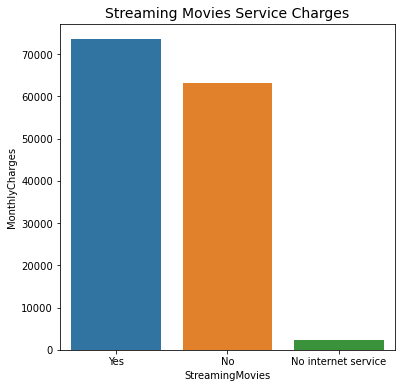

In [102]:
dfsvs5=df.query('Churn=="Yes"').groupby(['StreamingMovies'],as_index=False).agg({'MonthlyCharges':'sum'}).sort_values(by='MonthlyCharges',ascending=False)
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title( "Streaming Movies Service Charges" , size = 14 )
sns.barplot(dfsvs5.StreamingMovies,dfsvs5.MonthlyCharges)

Q2a. Ans: Top 3 Services with increasing charges resulting in Churn:
Internet Services (Fibre Optic), Phone Services and Multiple Lines Service

#### Q2b. Phone Service Contract

In [119]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [122]:
df.query('Churn=="No"').groupby(['PhoneService','Contract']).agg({'Contract':'count'}).sort_values(by='PhoneService',ascending=False)

Contract
PhoneService Contract                
Yes          Month-to-month      1997
             One year            1176
             Two year            1489
No           Month-to-month       223
             One year             131
             Two year             158

Q2b. Ans: Month-to-Month Contract Type is needed here

#### Q3a.Customer Services

In [181]:
#df_bouquet=df.query('Churn=="No"').groupby(['PhoneService']).agg({'MonthlyCharges':'sum'})
df.query('Churn=="No"').groupby(['PhoneService']).agg({'MonthlyCharges':'sum'}).sort_values(by='PhoneService',ascending=False)

,MonthlyCharges
PhoneService,
Yes,294703.00
No,22282.75


In [180]:
df.query('Churn=="No"').groupby(['InternetService']).agg({'MonthlyCharges':'sum'}).sort_values(by='InternetService',ascending=False)

,MonthlyCharges
InternetService,
No,29865.25
Fiber optic,168984.35
DSL,118136.15


In [179]:
df.query('Churn=="No"').groupby(['MultipleLines']).agg({'MonthlyCharges':'sum'}).sort_values(by='MultipleLines',ascending=False)

,MonthlyCharges
MultipleLines,
Yes,168021.35
No phone service,22282.75
No,126681.65


In [178]:
df.query('Churn=="No"').groupby(['OnlineSecurity']).agg({'MonthlyCharges':'sum'}).sort_values(by='OnlineSecurity',ascending=False)

,MonthlyCharges
OnlineSecurity,
Yes,135108.90
No internet service,29865.25
No,152011.60


In [183]:
df.query('Churn=="No"').groupby(['OnlineBackup']).agg({'MonthlyCharges':'sum'}).sort_values(by='OnlineBackup',ascending=False)

,MonthlyCharges
OnlineBackup,
Yes,156849.80
No internet service,29865.25
No,130270.70


In [184]:
df.query('Churn=="No"').groupby(['DeviceProtection']).agg({'MonthlyCharges':'sum'}).sort_values(by='DeviceProtection',ascending=False)

,MonthlyCharges
DeviceProtection,
Yes,157362.50
No internet service,29865.25
No,129758.00


In [185]:
df.query('Churn=="No"').groupby(['TechSupport']).agg({'MonthlyCharges':'sum'}).sort_values(by='TechSupport',ascending=False)

,MonthlyCharges
TechSupport,
Yes,138790.75
No internet service,29865.25
No,148329.75


In [186]:
df.query('Churn=="No"').groupby(['StreamingTV']).agg({'MonthlyCharges':'sum'}).sort_values(by='StreamingTV',ascending=False)

,MonthlyCharges
StreamingTV,
Yes,166545.50
No internet service,29865.25
No,120575.00


In [23]:
df.query('Churn=="No"').groupby(['StreamingMovies']).agg({'MonthlyCharges':'sum'}).sort_values(by='StreamingMovies',ascending=False)

,MonthlyCharges
StreamingMovies,
Yes,168149.95
No internet service,29865.25
No,118970.55


In [24]:
df_Service=df.query('Churn=="No"').groupby(['PhoneService','MultipleLines']).agg({'MonthlyCharges':'mean'}).sort_values(by='MonthlyCharges',ascending=False)

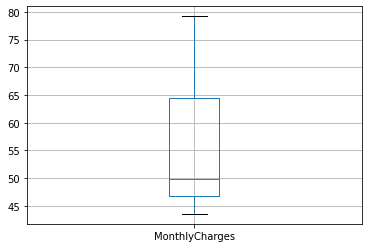

In [26]:
boxplot=df_Service.boxplot(column=['MonthlyCharges'])

Q3a. Ans: Basic 47.5, Plus=55, Premium=65

#### Q3b.Customer Services

In [153]:
df_bill=df.query('Churn=="No"').groupby(['PaperlessBilling']).agg({'PaymentMethod':'count'})
df_bill.reset_index(inplace=True)
df_bill

,PaperlessBilling,PaymentMethod
0,No,2403
1,Yes,2771


Text(0, 0.5, 'Payment Method')

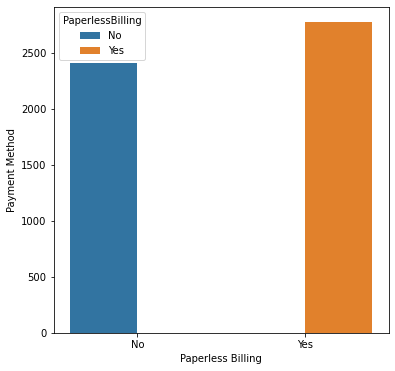

In [161]:

plt.figure(figsize=(6,6))
sns.barplot(x="PaperlessBilling", y="PaymentMethod", hue="PaperlessBilling", data=df_bill)
plt.xlabel("Paperless Billing")
plt.ylabel("Payment Method")

Q3b. Ans: Going Strictly Paperless would result in a Huge Customer Churn of close to 50% of base, hence not recommended